In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [185]:
df = pd.read_csv("new_log2.txt")
df = df.sort_values(by="time")
df = df.dropna().reset_index()
times = df["time"].unique()
values = [times[0]]
print(values)
for time in times:
    add = True
    for value in values:
        if abs(value-time) < 100000:
            add = False
    if add:
        values.append(time)
        
print(f"Total number of packets: {len(values)} \n")
        
sizes = [i for _ in range(50) for i in range(64, 1025, 64)]


print(len(sizes), len(values))

shapes = []
times = {}
function_calls = {}
total_times = {}
sdap_total_calls = []

for time in np.unique(sizes):
    total_times[time] = []

for module in df["module"].unique():
    times[module] = {}
    for time in sizes:
        times[module][time] = []
    function_calls[module] = []

for time, size in zip(values, sizes):
    print("\n#################\n")
    print(f"Start time: {time}, size: {size}")
    df_temp = df[df["time"] >= time][df["time"] < time+50000]
    df_temp = df_temp.sort_values(by="time")
    shapes.append(df_temp[df_temp["timing"] == "start"].shape[0])
    sdap_calls = df_temp[df_temp["function"] == "sdap_data_req"][df_temp["timing"] == "start"].shape[0]
    sdap_total_calls.append(sdap_calls)
    print(f"SDAP entries: {sdap_calls}")
    end_time = df_temp["time"].max()
    total_time = df_temp["time"].max()-df_temp["time"].min()
    
    if total_time > 5000:
        continue
    
    ## Create Temp Dict
    protocol_time = {}
    for module in df_temp["module"].unique():        
        calls = df_temp[df_temp["module"] == module][df_temp["timing"] == "start"].shape[0]
        function_calls[module].append(calls)
        protocol_time[module] = 0
    
    ## Calculate Times of Protocol based on "start" rows
    start = df_temp.reset_index()
    for ind in start.index[:-1]:
        curr_time = start["time"][ind]
        next_time = start["time"][ind+1]
        time = next_time - curr_time
        
        if start["function"][ind+1] == "start":
            module = start["module"][ind+1]
        else:
            module = start["module"][ind+1]
        protocol_time[module] += time
    
    ## Add Times to Final Dict
    temp = 0 
    for i in protocol_time:
        print(f"{i}: {protocol_time[i]}")
        temp += protocol_time[i]
        times[i][size].append(protocol_time[i])
    total_times[size].append(total_time)
    print(f"Total time: {total_time}")
    

[159060014.0]
Total number of packets: 800 

800 800

#################

Start time: 159060014.0, size: 64
SDAP entries: 1
[SDAP]: 551.0
[PDCP]: 253.0
[RLC]: 223.0
Total time: 1027.0

#################

Start time: 159236573.0, size: 128
SDAP entries: 1
[SDAP]: 291.0
[PDCP]: 137.0
[RLC]: 679.0
Total time: 1107.0

#################

Start time: 159414136.0, size: 192
SDAP entries: 1
[SDAP]: 177.0
[PDCP]: 112.0
[RLC]: 400.0
Total time: 689.0

#################

Start time: 159591240.0, size: 256
SDAP entries: 1
[SDAP]: 143.0
[PDCP]: 455.0
[RLC]: 629.0
Total time: 1227.0

#################

Start time: 159769929.0, size: 320
SDAP entries: 1
[SDAP]: 371.0
[PDCP]: 326.0
[RLC]: 574.0
Total time: 1271.0

#################

Start time: 159947920.0, size: 384
SDAP entries: 1
[SDAP]: 105.0
[PDCP]: 147.0
[RLC]: 242.0
Total time: 494.0

#################

Start time: 160126877.0, size: 448
SDAP entries: 1
[SDAP]: 191.0
[PDCP]: 203.0
[RLC]: 696.0
Total time: 1090.0

#################

Start time: 1

SDAP entries: 1
[SDAP]: 299.0
[PDCP]: 247.0
[RLC]: 500.0
Total time: 1046.0

#################

Start time: 172916740.0, size: 960
SDAP entries: 1
[SDAP]: 174.0
[PDCP]: 253.0
[RLC]: 416.0
Total time: 843.0

#################

Start time: 173094327.0, size: 1024
SDAP entries: 1
[SDAP]: 215.0
[PDCP]: 357.0
[RLC]: 293.0
Total time: 865.0

#################

Start time: 173268853.0, size: 64
SDAP entries: 1
[SDAP]: 341.0
[PDCP]: 141.0
[RLC]: 453.0
Total time: 935.0

#################

Start time: 173444603.0, size: 128
SDAP entries: 1
[SDAP]: 184.0
[PDCP]: 256.0
[RLC]: 462.0
Total time: 902.0

#################

Start time: 173622555.0, size: 192
SDAP entries: 1
[SDAP]: 189.0
[PDCP]: 298.0
[RLC]: 480.0
Total time: 967.0

#################

Start time: 173799610.0, size: 256
SDAP entries: 1
[SDAP]: 351.0
[PDCP]: 171.0
[RLC]: 549.0
Total time: 1071.0

#################

Start time: 173977267.0, size: 320
SDAP entries: 1
[SDAP]: 152.0
[PDCP]: 194.0
[RLC]: 842.0
Total time: 1188.0

###########

SDAP entries: 1
[SDAP]: 277.0
[PDCP]: 303.0
[RLC]: 691.0
Total time: 1271.0

#################

Start time: 187105181.0, size: 960
SDAP entries: 1
[SDAP]: 139.0
[PDCP]: 179.0
[RLC]: 968.0
Total time: 1286.0

#################

Start time: 187283512.0, size: 1024
SDAP entries: 1
[SDAP]: 243.0
[PDCP]: 194.0
[RLC]: 651.0
Total time: 1088.0

#################

Start time: 187460463.0, size: 64
SDAP entries: 1
[SDAP]: 195.0
[PDCP]: 254.0
[RLC]: 781.0
Total time: 1230.0

#################

Start time: 187637024.0, size: 128
SDAP entries: 1
[SDAP]: 343.0
[PDCP]: 42.0
[RLC]: 451.0
Total time: 836.0

#################

Start time: 187812518.0, size: 192
SDAP entries: 1
[SDAP]: 508.0
[PDCP]: 120.0
[RLC]: 779.0
Total time: 1407.0

#################

Start time: 187989994.0, size: 256
SDAP entries: 1
[SDAP]: 319.0
[PDCP]: 389.0
[RLC]: 529.0
Total time: 1237.0

#################

Start time: 188167763.0, size: 320
SDAP entries: 1
[SDAP]: 107.0
[PDCP]: 282.0
[RLC]: 944.0
Total time: 1333.0

########

SDAP entries: 1
[SDAP]: 196.0
[PDCP]: 146.0
[RLC]: 538.0
Total time: 880.0

#################

Start time: 201479260.0, size: 1024
SDAP entries: 1
[SDAP]: 374.0
[PDCP]: 165.0
[RLC]: 1263.0
Total time: 1802.0

#################

Start time: 201657380.0, size: 64
SDAP entries: 1
[SDAP]: 73.0
[PDCP]: 178.0
[RLC]: 1054.0
Total time: 1305.0

#################

Start time: 201835799.0, size: 128
SDAP entries: 1
[SDAP]: 361.0
[PDCP]: 68.0
[RLC]: 638.0
Total time: 1067.0

#################

Start time: 202012847.0, size: 192
SDAP entries: 1
[SDAP]: 342.0
[PDCP]: 195.0
[RLC]: 592.0
Total time: 1129.0

#################

Start time: 202190000.0, size: 256
SDAP entries: 1
[SDAP]: 564.0
[PDCP]: 215.0
[RLC]: 357.0
Total time: 1136.0

#################

Start time: 202367175.0, size: 320
SDAP entries: 1
[SDAP]: 235.0
[PDCP]: 58.0
[RLC]: 572.0
Total time: 865.0

#################

Start time: 202544364.0, size: 384
SDAP entries: 1
[SDAP]: 383.0
[PDCP]: 153.0
[RLC]: 505.0
Total time: 1041.0

#########

SDAP entries: 1
[SDAP]: 142.0
[PDCP]: 232.0
[RLC]: 637.0
Total time: 1011.0

#################

Start time: 216386213.0, size: 256
SDAP entries: 1
[SDAP]: 258.0
[PDCP]: 94.0
[RLC]: 316.0
Total time: 668.0

#################

Start time: 216562776.0, size: 320
SDAP entries: 1
[SDAP]: 214.0
[PDCP]: 69.0
[RLC]: 770.0
Total time: 1053.0

#################

Start time: 216739882.0, size: 384
SDAP entries: 1
[SDAP]: 329.0
[PDCP]: 94.0
[RLC]: 474.0
Total time: 897.0

#################

Start time: 216917274.0, size: 448
SDAP entries: 1
[SDAP]: 300.0
[PDCP]: 118.0
[RLC]: 404.0
Total time: 822.0

#################

Start time: 217098094.0, size: 512
SDAP entries: 1
[SDAP]: 315.0
[PDCP]: 200.0
[RLC]: 637.0
Total time: 1152.0

#################

Start time: 217276464.0, size: 576
SDAP entries: 1
[SDAP]: 218.0
[PDCP]: 133.0
[RLC]: 275.0
Total time: 626.0

#################

Start time: 217452803.0, size: 640
SDAP entries: 1
[SDAP]: 291.0
[PDCP]: 274.0
[RLC]: 282.0
Total time: 847.0

##############

SDAP entries: 1
[SDAP]: 180.0
[PDCP]: 286.0
[RLC]: 452.0
Total time: 918.0

#################

Start time: 231283056.0, size: 512
SDAP entries: 1
[SDAP]: 265.0
[PDCP]: 287.0
[RLC]: 580.0
Total time: 1132.0

#################

Start time: 231460688.0, size: 576
SDAP entries: 1
[SDAP]: 648.0
[PDCP]: 147.0
[RLC]: 759.0
Total time: 1554.0

#################

Start time: 231637981.0, size: 640
SDAP entries: 1
[SDAP]: 92.0
[PDCP]: 455.0
[RLC]: 801.0
Total time: 1348.0

#################

Start time: 231815622.0, size: 704
SDAP entries: 1
[SDAP]: 148.0
[PDCP]: 338.0
[RLC]: 573.0
Total time: 1059.0

#################

Start time: 231992692.0, size: 768
SDAP entries: 1
[SDAP]: 330.0
[PDCP]: 688.0
[RLC]: 641.0
Total time: 1659.0

#################

Start time: 232170307.0, size: 832
SDAP entries: 1
[SDAP]: 226.0
[PDCP]: 218.0
[RLC]: 385.0
Total time: 829.0

#################

Start time: 232347010.0, size: 896
SDAP entries: 1
[SDAP]: 311.0
[PDCP]: 272.0
[RLC]: 516.0
Total time: 1099.0

#########

SDAP entries: 1
[SDAP]: 173.0
[PDCP]: 301.0
[RLC]: 494.0
Total time: 968.0

#################

Start time: 246904514.0, size: 1024
SDAP entries: 1
[SDAP]: 152.0
[PDCP]: 73.0
[RLC]: 626.0
Total time: 851.0

#################

Start time: 247081610.0, size: 64
SDAP entries: 1
[SDAP]: 303.0
[PDCP]: 405.0
[RLC]: 189.0
Total time: 897.0

#################

Start time: 247261572.0, size: 128
SDAP entries: 1
[SDAP]: 280.0
[PDCP]: 112.0
[RLC]: 706.0
Total time: 1098.0

#################

Start time: 247438763.0, size: 192
SDAP entries: 1
[SDAP]: 225.0
[PDCP]: 50.0
[RLC]: 620.0
Total time: 895.0

#################

Start time: 247616858.0, size: 256
SDAP entries: 1
[SDAP]: 189.0
[PDCP]: 70.0
[RLC]: 493.0
Total time: 752.0

#################

Start time: 247795254.0, size: 320
SDAP entries: 1
[SDAP]: 174.0
[PDCP]: 170.0
[RLC]: 227.0
Total time: 571.0

#################

Start time: 247972453.0, size: 384
SDAP entries: 1
[SDAP]: 275.0
[PDCP]: 284.0
[RLC]: 497.0
Total time: 1056.0

###############

SDAP entries: 1
[SDAP]: 308.0
[PDCP]: 303.0
[RLC]: 190.0
Total time: 801.0

#################

Start time: 262702414.0, size: 576
SDAP entries: 1
[SDAP]: 340.0
[PDCP]: 206.0
[RLC]: 741.0
Total time: 1287.0

#################

Start time: 262878485.0, size: 640
SDAP entries: 1
[SDAP]: 341.0
[PDCP]: 272.0
[RLC]: 234.0
Total time: 847.0

#################

Start time: 263057701.0, size: 704
SDAP entries: 1
[SDAP]: 298.0
[PDCP]: 110.0
[RLC]: 565.0
Total time: 973.0

#################

Start time: 263234692.0, size: 768
SDAP entries: 1
[SDAP]: 578.0
[PDCP]: 120.0
[RLC]: 676.0
Total time: 1374.0

#################

Start time: 263409625.0, size: 832
SDAP entries: 1
[SDAP]: 235.0
[PDCP]: 343.0
[RLC]: 464.0
Total time: 1042.0

#################

Start time: 263588288.0, size: 896
SDAP entries: 1
[SDAP]: 115.0
[PDCP]: 356.0
[RLC]: 655.0
Total time: 1126.0

#################

Start time: 263765812.0, size: 960
SDAP entries: 1
[SDAP]: 313.0
[PDCP]: 458.0
[RLC]: 285.0
Total time: 1056.0

#########

SDAP entries: 1
[SDAP]: 350.0
[PDCP]: 134.0
[RLC]: 844.0
Total time: 1328.0

#################

Start time: 278777404.0, size: 192
SDAP entries: 1
[SDAP]: 339.0
[PDCP]: 185.0
[RLC]: 631.0
Total time: 1155.0

#################

Start time: 278957464.0, size: 256
SDAP entries: 1
[SDAP]: 125.0
[PDCP]: 170.0
[RLC]: 610.0
Total time: 905.0

#################

Start time: 279138376.0, size: 320
SDAP entries: 1
[SDAP]: 514.0
[PDCP]: 176.0
[RLC]: 913.0
Total time: 1603.0

#################

Start time: 279318382.0, size: 384
SDAP entries: 1
[SDAP]: 226.0
[PDCP]: 48.0
[RLC]: 537.0
Total time: 811.0

#################

Start time: 279498862.0, size: 448
SDAP entries: 1
[SDAP]: 154.0
[PDCP]: 540.0
[RLC]: 590.0
Total time: 1284.0

#################

Start time: 279681018.0, size: 512
SDAP entries: 1
[SDAP]: 150.0
[PDCP]: 135.0
[RLC]: 1157.0
Total time: 1442.0

#################

Start time: 279860552.0, size: 576
SDAP entries: 1
[SDAP]: 354.0
[PDCP]: 338.0
[RLC]: 394.0
Total time: 1086.0

########

SDAP entries: 1
[SDAP]: 140.0
[PDCP]: 423.0
[RLC]: 813.0
Total time: 1376.0

#################

Start time: 294761314.0, size: 768
SDAP entries: 1
[SDAP]: 83.0
[PDCP]: 149.0
[RLC]: 364.0
Total time: 596.0

#################

Start time: 294938785.0, size: 832
SDAP entries: 1
[SDAP]: 217.0
[PDCP]: 122.0
[RLC]: 871.0
Total time: 1210.0

#################

Start time: 295115990.0, size: 896
SDAP entries: 1
[SDAP]: 458.0
[PDCP]: 529.0
[RLC]: 697.0
Total time: 1684.0

#################

Start time: 295295758.0, size: 960
SDAP entries: 1
[SDAP]: 379.0
[PDCP]: 168.0
[RLC]: 936.0
Total time: 1483.0

#################

Start time: 295470915.0, size: 1024
SDAP entries: 1
[SDAP]: 213.0
[PDCP]: 321.0
[RLC]: 605.0
Total time: 1139.0

#################

Start time: 295649602.0, size: 64
SDAP entries: 1
[SDAP]: 428.0
[PDCP]: 194.0
[RLC]: 763.0
Total time: 1385.0

#################

Start time: 295826011.0, size: 128
SDAP entries: 1
[SDAP]: 208.0
[PDCP]: 364.0
[RLC]: 1041.0
Total time: 1613.0

#######

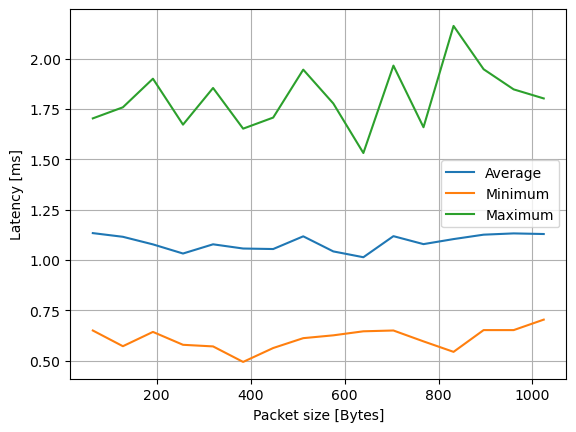

In [189]:
times_for_plot = []
sizes_for_plot = []
mins = []
maxs = []

for i in total_times:
    times_for_plot.append(np.mean(total_times[i])/1000)
    sizes_for_plot.append(i)
    mins.append(np.min(total_times[i])/1000)
    maxs.append(np.max(total_times[i])/1000)
    
plt.plot(sizes_for_plot, times_for_plot, label="Average")
plt.plot(sizes_for_plot, mins, label="Minimum")
plt.plot(sizes_for_plot, maxs, label="Maximum")
plt.grid()
plt.legend()
plt.xlabel("Packet size [Bytes]")
plt.ylabel("Latency [ms]")
plt.savefig("small-packets_latency-ovr.png")
plt.show()

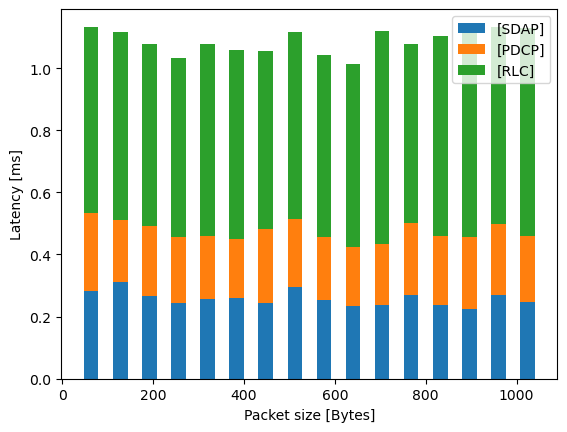

In [192]:
bottom = np.zeros(len(times["[RLC]"]))
avg = {}

for i in times:
    avg[i] = []

for i in times:
    for size in np.unique(sizes):
        data = times[i][size]
        avg[i].append(np.mean(data))

bottom = np.zeros(len(avg["[RLC]"]))

for i in avg:
    data = np.array(avg[i])/1000
    plt.bar(np.unique(sizes), data, label=f"{i}", width=32, bottom=bottom, align="center")
    bottom += data
    
plt.legend()
#plt.grid()
plt.xlabel("Packet size [Bytes]")
plt.ylabel("Latency [ms]")
plt.savefig("small-packets_latency-bar.png")
plt.show()

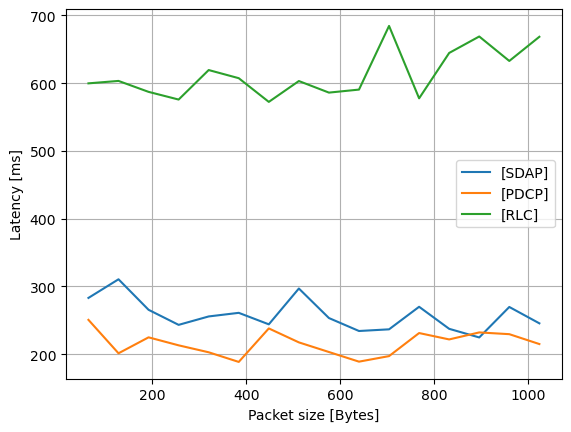

In [193]:
for i in avg:
    data = np.array(avg[i])
    plt.plot(np.unique(sizes), data, label=f"{i}")
plt.grid()
plt.legend()
plt.xlabel("Packet size [Bytes]")
plt.ylabel("Latency [ms]")
plt.savefig("small-packets_latency-plot.png")
plt.show()